In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import neighbors

from sklearn.model_selection import cross_val_score

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

## Original KNN and Error Results

This KNN classifier was done with a data on the loudness, duration, and BPM a selection of songs. 

The initial KNN classifer attempts to predict the BPM from data on the loudness.

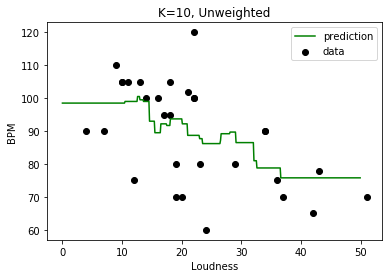

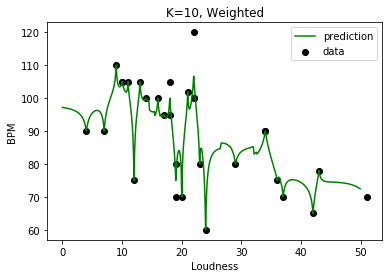

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


In [22]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.show()

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.xlabel('Loudness')
plt.ylabel('BPM')
plt.show()

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Here I am given 2 graphs, both have the actual values of loudness and beats per minute.  However, the first graph has the unweighted initial KNN classifier, while the second graph has the weighted (by distance) initial KNN classifier. 

Both do not appear to be good classifiers, with the weighted classifier being particularly overfit. I want to improve on these classifers.

## New KNN Classifier.

The first thing I want to do is the duration variable to my KNN classifier. 

In [24]:
# Unweighted
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness','duration']]
Y = music.bpm
knn.fit(X, Y)

# Weighted by Distance
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = music[['loudness','duration']]
Y = music.bpm
knn_w.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)


Interestingly, adding in another variable made the unweighted error go up both in mean and variance. However, the weighted error mean went up but it's variance went down. It seems like adding in another feature has only made the KNN classifier worse.

What happens when I change the number of neighbors?

In [29]:
# Unweighted
knn5 = neighbors.KNeighborsRegressor(n_neighbors=5)
X = music[['loudness','duration']]
Y = music.bpm
knn.fit(X, Y)

# Unweighted
knn23 = neighbors.KNeighborsRegressor(n_neighbors=23)
X = music[['loudness','duration']]
Y = music.bpm
knn.fit(X, Y)

# Weighted by Distance
knn5_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = music[['loudness','duration']]
Y = music.bpm
knn_w.fit(X, Y)

# Weighted by Distance
knn23_w = neighbors.KNeighborsRegressor(n_neighbors=23, weights='distance')
X = music[['loudness','duration']]
Y = music.bpm
knn_w.fit(X, Y)

score = cross_val_score(knn5, X, Y, cv=5)
print("Unweighted Accuracy, K=5: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score = cross_val_score(knn23, X, Y, cv=5)
print("Unweighted Accuracy, K=23: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn5_w, X, Y, cv=5)
print("Weighted Accuracy, K=5: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
score_w = cross_val_score(knn23_w, X, Y, cv=5)
print("Weighted Accuracy, K=23: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy, K=5: -0.75 (+/- 1.16)
Unweighted Accuracy, K=23: -0.31 (+/- 0.57)
Weighted Accuracy, K=5: -0.51 (+/- 1.24)
Weighted Accuracy, K=23: -0.23 (+/- 0.60)


I have run the classifier with 5 neighbors and with 23 neighbors, the maximum amount since there are 24 data points. Having more neighbors certainly decreases the error, but comes with the problem of overfitting the data.